In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
dfx = pd.read_csv('Linear_X_Train.csv')
dfy = pd.read_csv('Linear_Y_Train.csv')

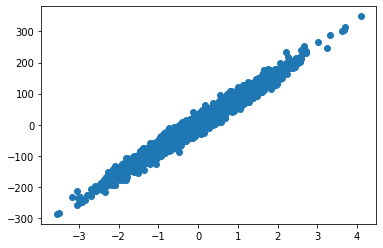

In [3]:
x = dfx.values
y = dfy.values
plt.scatter(x,y)

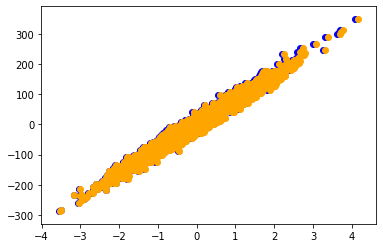

In [4]:
X = (x-x.mean())/(x.std())
Y = y
plt.scatter(x,y,color='blue')
plt.scatter(X,Y, color='orange')
plt.show()


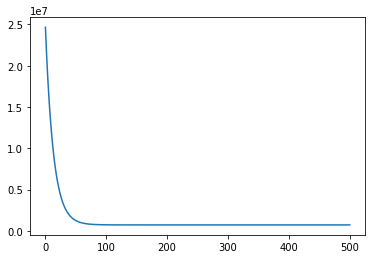

In [17]:
def hypothesis(X, theta):
    return theta[0] + theta[1]*X
def error(X,Y,theta):
    m = x.shape[0]
    error = 0
    for i in range(m):
        hx = hypothesis(X[i], theta)
        error += (hx - Y[i])**2
    return error
def gradient(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        hx=   hypothesis(X[i], theta)     
        grad[0]+= hx - Y[i]
        grad[1] += (hx - Y[i]) * X[i]
    return grad
        
def gradientDescent(X, Y , learningRate=0.00001):
    theta = np.zeros((2,))
    itr = 0
    error_list=[]
    
    while(itr<=500):
        grad = gradient(X,Y,theta)
        e=error(X,Y,theta)
        theta[0]=theta[0] - learningRate*grad[0]
        theta[1]=theta[1] - learningRate*grad[1]
        error_list.append(e)
        itr+=1
    return theta,error_list
    
final_theta, error_list = gradientDescent(X,Y)
plt.plot(error_list)

[ 0.68386896 79.90573656]


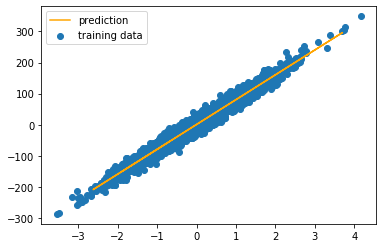

In [18]:

print(final_theta)
dftest =  pd.read_csv("Linear_X_Test.csv")
xtest = dftest.values
plt.scatter(X,Y, label="training data")
plt.plot(xtest, hypothesis(xtest,final_theta), color='orange', label='prediction')
plt.legend()
plt.show()

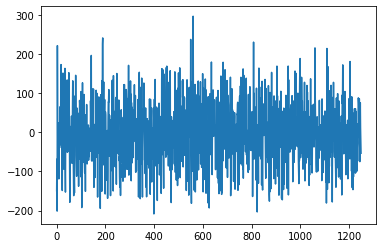

In [43]:
output_list = []
m = xtest.shape[0]
for i in range(m):
    hx = hypothesis(xtest[i],final_theta)
    output_list.append(hx[0])
plt.plot(output_list)
with open("output.csv", 'w', newline='') as myfile:
     wr = csv.writer(myfile, delimiter = "\n")
     wr.writerow("y")
     #(print(out) for out in output_list)
     wr.writerow(output_list)